# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                  0.11890          NaN  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  
3          0.6638                  0.17300          NaN  
4          0.2364                  0.07678          NaN  

[5 rows x 32 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [3]:
# Perform K-Means Clustering on the Dataset

In [4]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# lets first make a copy of the dataset
df_km1 = df.copy()
df_km1.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [6]:
# lets drop some columns
df_km1 = df_km1.drop(['id', 'Unnamed: 32'], axis=1)

In [7]:
df_km1.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

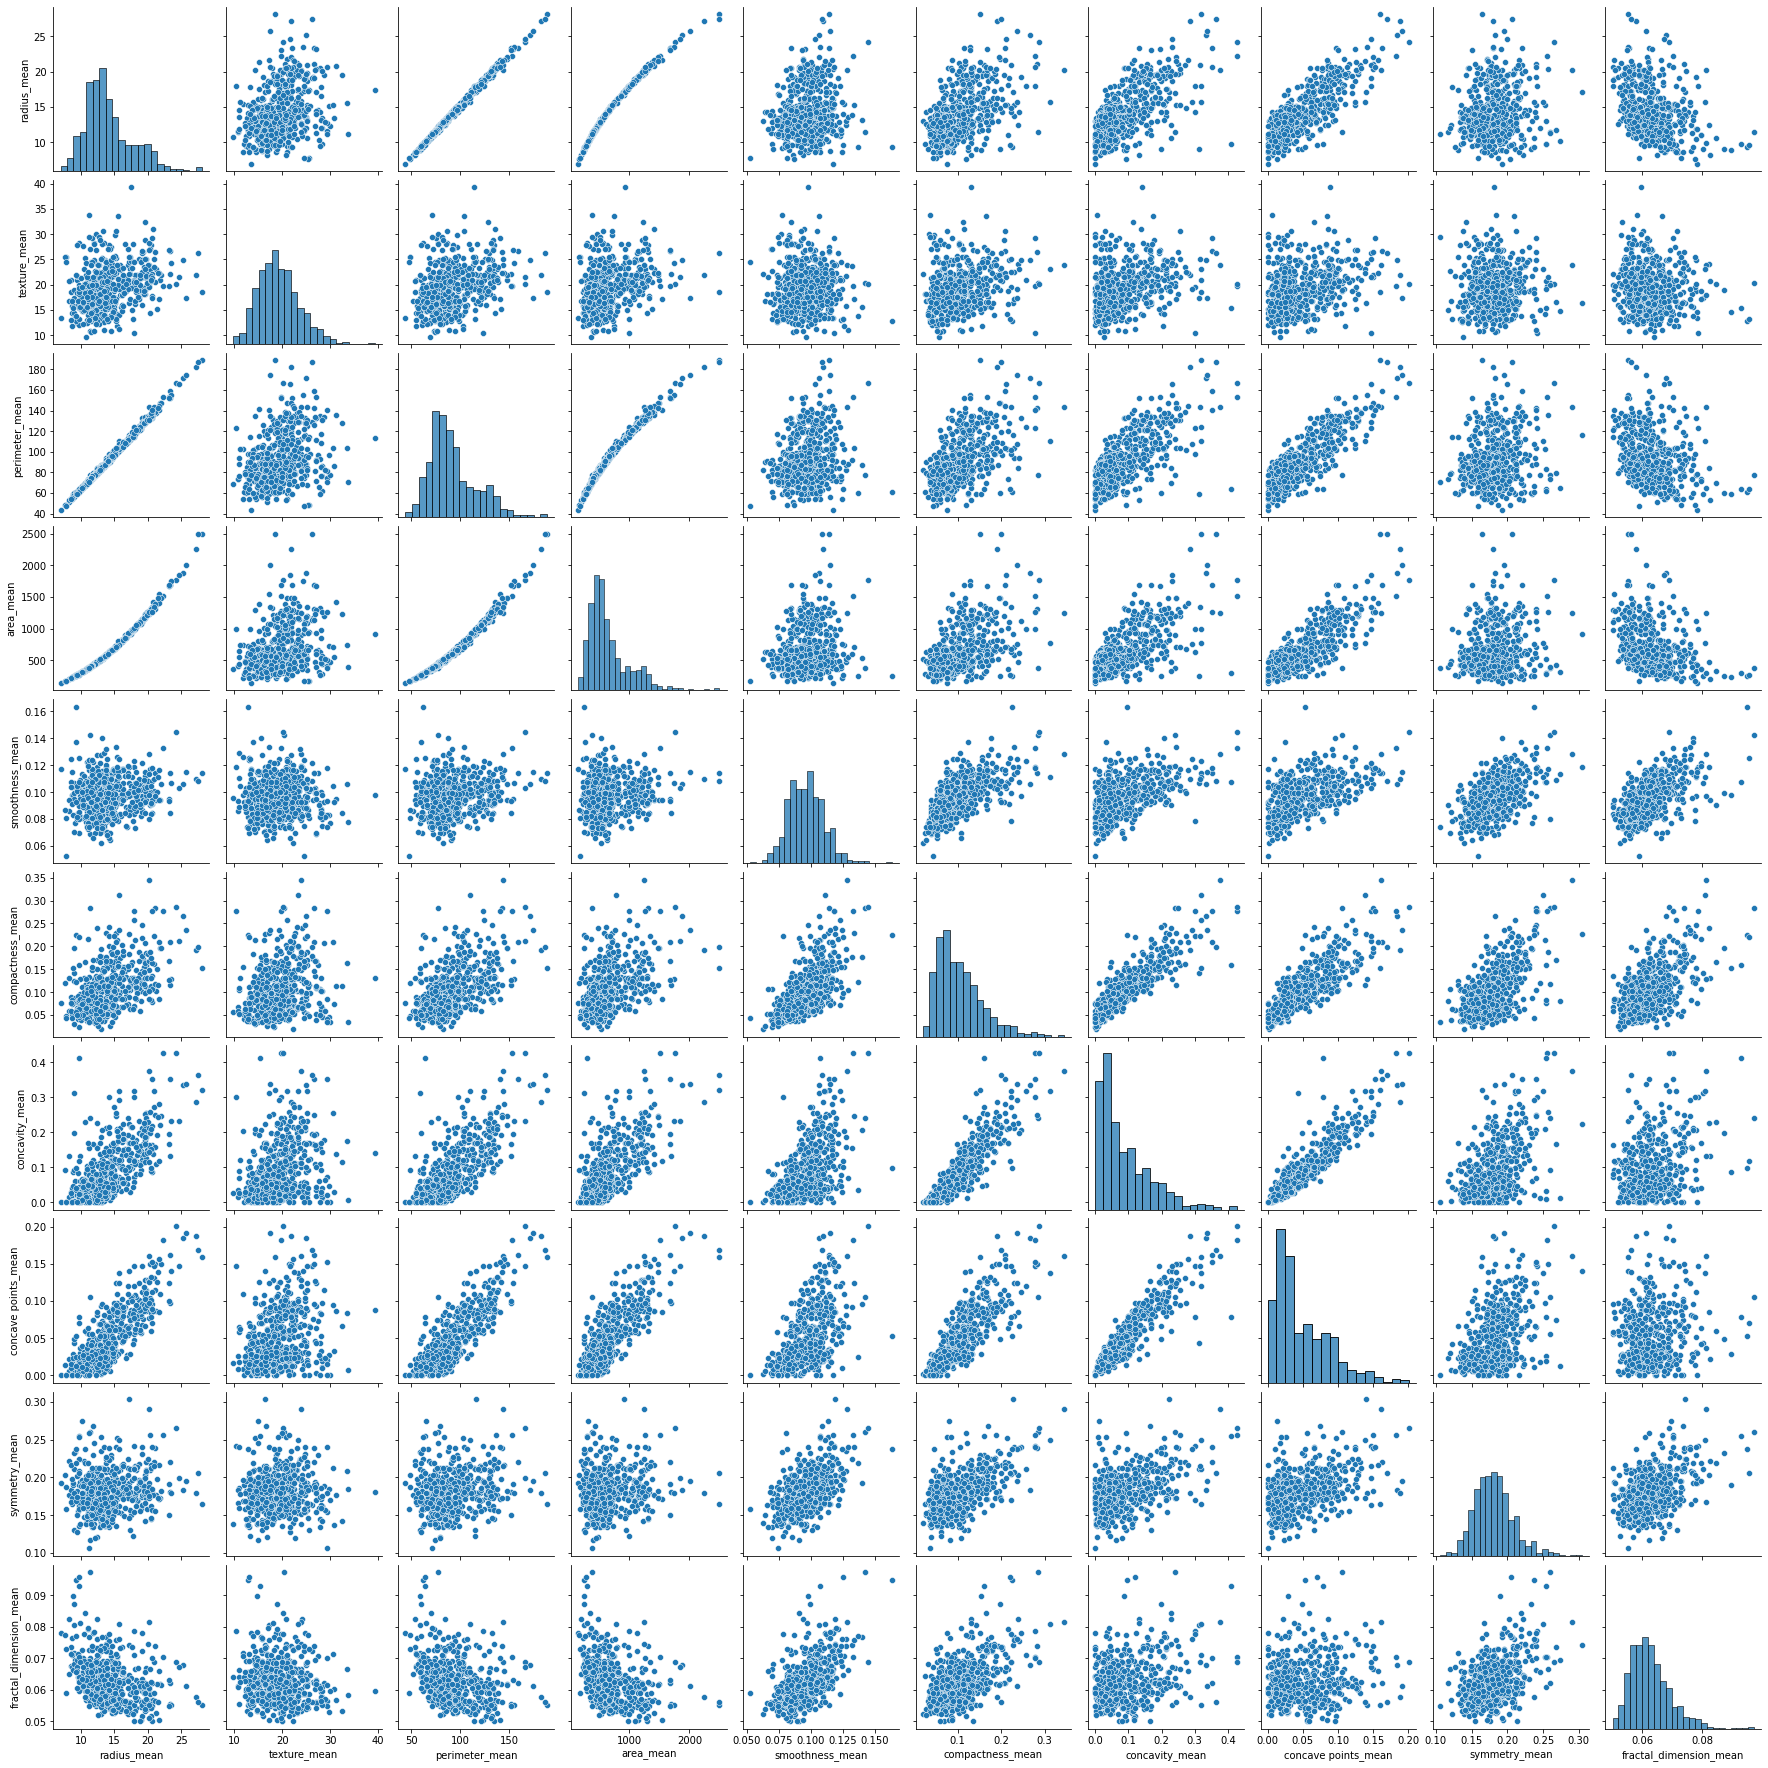

In [8]:
# lets plot some relations
# cant really see any distinct clusters 
import matplotlib.pyplot as plt 
import seaborn as sns

# plt.scatter(df['fractal_dimension_se'], df['texture_se'])
sns.pairplot(df_km1.iloc[:, :10])

In [9]:
# lets perform an elbow method to decide on the number of clusters
from sklearn.cluster import KMeans 

sum_of_squared_distances = []
K = range(1, 15)

for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(df_km1)
  sum_of_squared_distances.append(km.inertia_)

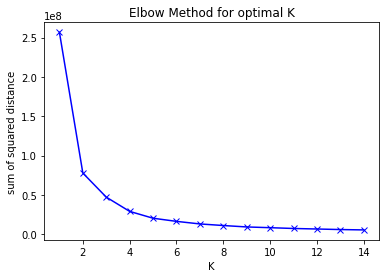

In [10]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('sum of squared distance')
plt.title('Elbow Method for optimal K')
plt.show()

In [11]:
# number of cluster is 2 
model = KMeans(n_clusters=2)
model.fit(df_km1)
model.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [12]:
df_km1['preds'] = model.labels_

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [14]:
# gotta decide what 1s and zeroes stand for 
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [15]:
# B is for 1s and M for 0s
df_km1['preds'].value_counts()

0    438
1    131
Name: preds, dtype: int64

In [16]:
# create a column with real labels 
df_km1['labels'] = np.where(df['diagnosis']=='B', 1, 0)

In [17]:
# number of incorrect labels 
(df_km1['preds'] - df_km1['labels']).sum()

-226

In [18]:
# create a binary column 1-right predicted, 0-false 
df_km1['true_labels'] = np.where(df_km1['preds']==df_km1['labels'], 1, 0)

In [19]:
# calculate accuracy score 
accuracy = df_km1['true_labels'].sum()/len(df_km1['true_labels'])
print(f'Accuracy score is {accuracy*100}%')

Accuracy score is 14.586994727592268%


# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [20]:
# prepare data
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [21]:
df_km2 = df.copy()

In [22]:
df_km2 = df_km2.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
columns = df_km2.columns

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_km2 = scaler.fit_transform(df_km2)
df_km2 = pd.DataFrame(df_km2, columns=columns)
df_km2.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

In [24]:
pca = PCA(n_components=2)
df_km2 = pca.fit_transform(df_km2)

In [25]:
pd.DataFrame(df_km2)

0          1
0     9.192837   1.948583
1     2.387802  -3.768172
2     5.733896  -1.075174
3     7.122953  10.275589
4     3.935302  -1.948072
..         ...        ...
564   6.439315  -3.576817
565   3.793382  -3.584048
566   1.256179  -1.902297
567  10.374794   1.672010
568  -5.475243  -0.670637

[569 rows x 2 columns]

In [26]:
model = KMeans(n_clusters=2)
model.fit(df_km2)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [27]:
df_km2 = pd.DataFrame(df_km2)
df_km2['preds'] = model.labels_

In [28]:
df_km2['preds'].value_counts()

0    378
1    191
Name: preds, dtype: int64

In [29]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [30]:
# lets calculate accuracy 
df_km2['reals'] = np.where(df['diagnosis']=='B', 1, 0)

In [31]:
df_km2.columns

Index([0, 1, 'preds', 'reals'], dtype='object')

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [32]:
# lets calculate accuracy score for raw dataset
accuracy = df_km1['true_labels'].sum()/len(df_km1['true_labels'])
print(f'Accuracy score is {accuracy*100}%')

Accuracy score is 14.586994727592268%


In [33]:
# lets calculate accuracy for PCA dataset 
falses = df_km2['preds'] - df_km2['reals'] 
accuracy = (len(df_km2['preds']) - falses.sum())/len(df_km2['preds'])
print(f'Accuracy is {accuracy * 100}')

Accuracy is 129.1739894551845


###Let't compare raw scatter plot and PCA scatter plot

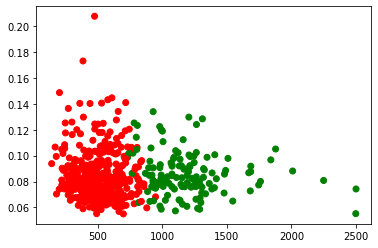

In [34]:
# raw values
base_colors  =  ['r', 'g']
colors =  [base_colors[centroid] for centroid in df_km1['preds']]
plt.scatter(df_km1['area_mean'], df_km1['fractal_dimension_worst'], c=colors)

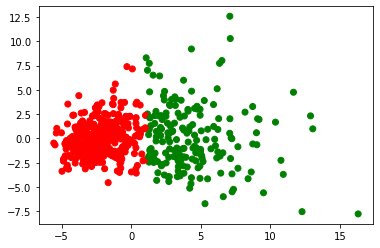

In [35]:
# PCA values 
base_colors = ['r', 'g']
colors = [base_colors[centroid] for centroid in df_km2['preds']]
plt.scatter(df_km2[0], df_km2[1], c=colors);

###Let't compare scatter plots of real values and values predicted after PCA 

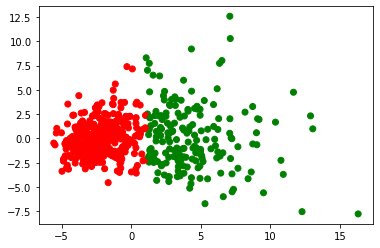

In [36]:
# predicted values 
base_colors = ['r', 'g']
colors = [base_colors[centroid] for centroid in df_km2['preds']]
plt.scatter(df_km2[0], df_km2[1], c=colors);

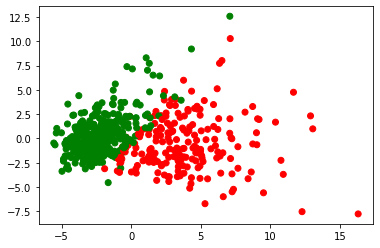

In [37]:
# real values 
base_colors = ['r', 'g']
colors = [base_colors[centroid] for centroid in df_km2['reals']]
plt.scatter(df_km2[0], df_km2[1], c=colors);

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project